# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Your code here
df = pd.read_csv("data/ames.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [6]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

<ipython-input-51-62cd6e1c8c5a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(ax0.get_xticks(), rotation = 45)
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Overall Condition')

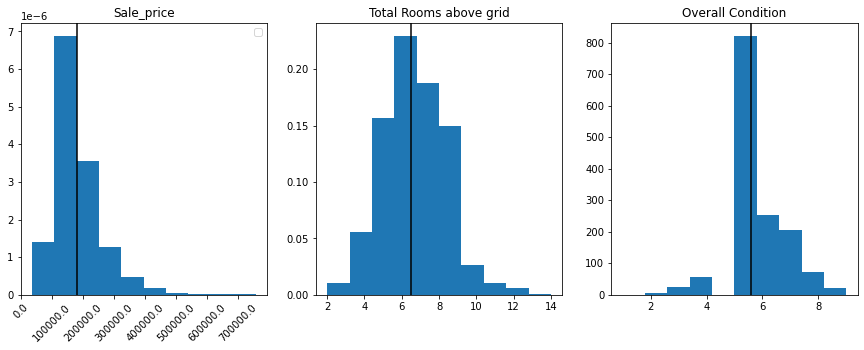

In [51]:
# Your code here
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))



ax0.hist(df["SalePrice"],density=True, histtype='bar')
ax0.set_xticklabels(ax0.get_xticks(), rotation = 45)
ax0.axvline(x=df["SalePrice"].mean(), c="Black")
ax0.legend(prop={'size': 10})
ax0.set_title('Sale_price')

ax1.hist(df["TotRmsAbvGrd"], density=True, histtype='bar')
ax1.axvline(x=df["TotRmsAbvGrd"].mean(), c="Black")
ax1.set_title('Total Rooms above grid')



ax2.hist(df["OverallCond"], fill=True, histtype='bar')
ax2.axvline(x=df["OverallCond"].mean(), c="Black")
ax2.set_title('Overall Condition')


Now, print out the mean, median, and standard deviation:

In [68]:
# Your code here
# print(f'The mean of SalePrice: {df["SalePrice"].mean()}')
# print(f'The median of SalePrice: {df["SalePrice"].median()}')
# print(f'The mode value of SalePrice: {df["SalePrice"].mode()}')
# print()
# print(f'The mean of : {df["TotRmsAbvGrd"].mean()}')
# print(f'The median of TotRmsAbvGrd: {df["TotRmsAbvGrd"].median()}')
# print(f'The mode value of TotRmsAbvGrd: {df["TotRmsAbvGrd"].mode()}')
# print(df["TotRmsAbvGrd"].median())
# print()
# print(f'The mean of : {df["OverallCond"].mean()}')
# print(f'The median of OverallCond: {df["OverallCond"].median()}')
# print(f'The mode value of OverallCond: {df["OverallCond"].mode()}')
select_column = ["SalePrice", "TotRmsAbvGrd", "OverallCond"]

for col in select_column:
    col_mean = df[col].mean()
    print(f' Mean of {col} is: {col_mean}')
    col_median = df[col].median()
    print(f' Median of {col} is: {col_median}')
    col_mode = df[col].mode()
    print(f' Mode of {col} is: {col_mode}')
    print()


 Mean of SalePrice is: 180921.19589041095
 Median of SalePrice is: 163000.0
 Mode of SalePrice is: 0    140000
dtype: int64

 Mean of TotRmsAbvGrd is: 6.517808219178082
 Median of TotRmsAbvGrd is: 6.0
 Mode of TotRmsAbvGrd is: 0    6
dtype: int64

 Mean of OverallCond is: 5.575342465753424
 Median of OverallCond is: 5.0
 Mode of OverallCond is: 0    5
dtype: int64



In the cell below, interpret the above information.

In [70]:
# Replace None with appropriate text
"""
The average Sale price of Houses in that area is 180,921 while the most commonly bought units cost 140,000.
The middle price is 163,000.
The average number of rooms in those unit is 6.5 with most houses having 6 rooms.
The middle number of room is also. 
This show a normal distribution of the data.
The average normal condition of the propety units is 5.57, most units in the data set are also rated 5.
The middle value is also 5 show a normal distribution the data.
"""

'\nThe average Sale price of Houses in that area is 180,921 while the most commonly bought units cost 140,000.\nThe middle price is 163,000.\nThe average number of rooms in those unit is 6.5 with most houses having 6 rooms.\nThe middle number of room is also. \nThis show a normal distribution of the data.\nThe average normal condition of the propety units is 5.57, most units in the data set are also rated 5.\nThe middle value is also 5 show a normal distribution the data.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

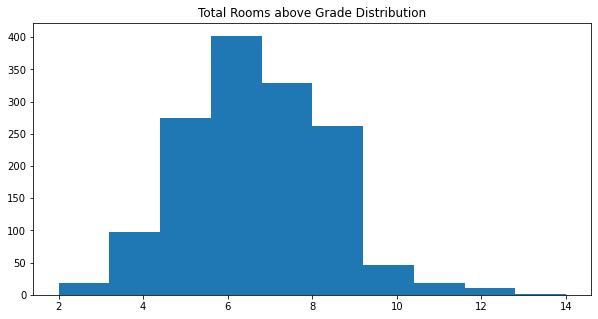

In [77]:
# Your code here
fig, ax = plt.subplots(figsize=[10,5])

ax.hist(df["TotRmsAbvGrd"])
ax.set_title("Total Rooms above Grade Distribution");

Now, print out the mean, median, and standard deviation:

In [79]:
# Your code here
print(f'The mean is: {df["TotRmsAbvGrd"].mean()}')
print(f'The median is: {df["TotRmsAbvGrd"].median()}')
print(f'The mode is: {df["TotRmsAbvGrd"].mode()}')


The mean is: 6.517808219178082
The median is: 6.0
The mode is: 0    6
dtype: int64


In the cell below, interpret the above information.

In [80]:
# Replace None with appropriate text
"""
The average number of Rooms above grade is 6 and is also the most common design with a mode of 6.
This represents a normally distributed data with the mean, median and mode being equal.
"""

'\nThe average number of Rooms above grade is 6 and is also the most common design with a mode of 6.\nThis represents a normally distributed data with the mean, median and mode being equal.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

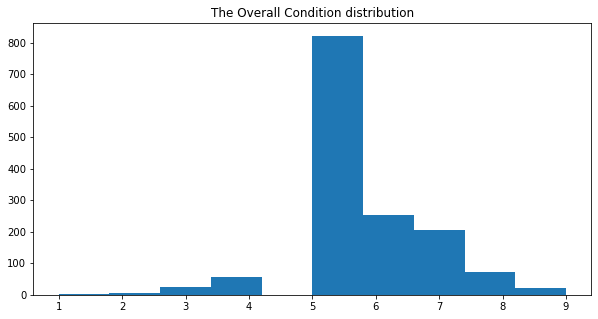

In [89]:
# Your code here
fig, ax3 = plt.subplots(figsize=[10,5])

ax3.hist(df["OverallCond"])
ax3.set_title("The Overall Condition distribution");

Now, print out the mean, median, and standard deviation:

In [91]:
# Your code here
print(f'This is the mean of the Overall condition of the units: {df["OverallCond"].mean()}')
print(f'This is the median: {df["OverallCond"].median()}')
print(f'This is the mode: {df["OverallCond"].mode()}')

This is the mean of the Overall condition of the units: 5.575342465753424
This is the median: 5.0
This is the mode: 0    5
dtype: int64


In the cell below, interpret the above information.

In [92]:
# Replace None with appropriate text
"""
The average overall condtion rating is 5.57 and most units were rated 5.
The median unit rating is also 5 showing a normal distribution of the data.
"""

'\nThe average overall condtion rating is 5.57 and most units were rated 5.\nThe median unit rating is also 5 showing a normal distribution of the data.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [107]:
# Replace None with appropriate code
below_average_condition = df.loc[df["OverallCond"]<5]
average_condition = df.loc[df["OverallCond"]==5]
above_average_condition = df.loc[df["OverallCond"]>5]

The following code checks that you created the subsets correctly:

In [109]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

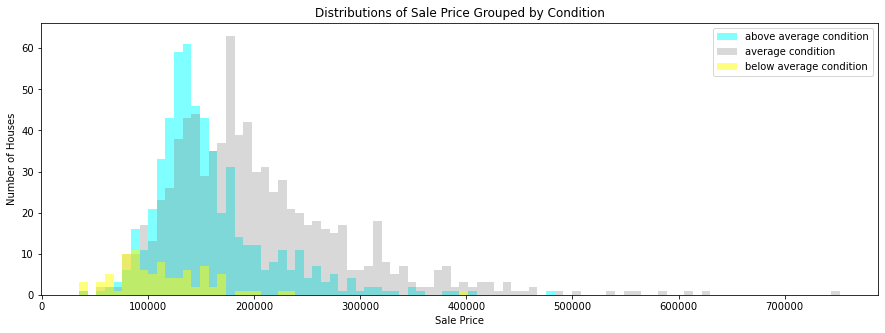

In [110]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [111]:
# Replace None with appropriate text
"""
The categories represent skewed distributions towards the lower prices.
The better the overall condition of the house, the higher the sale price.
There are houses above with a sale value above 500,000 with just an average overall condition."""

'\nThe categories represent skewed distributions towards the lower prices.\nThe better the overall condition of the house, the higher the sale price.\nThere are houses above with a sale value above 500,000 with just an average overall condition.'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [141]:
# Your code here
# Dropping the Sale Price Column
df_less_SalePrice = df.drop("SalePrice", axis=1)
# Getting the Correlation of SalePrice and the other columns
corr_with_SalPrice = df_less_SalePrice.corrwith(df["SalePrice"], axis=0, drop=False, method='pearson')
# Correlation Sorted in descending order
corr_with_SalPrice.sort_values(ascending=False)
# Most positively correlated
# Most_positively_correlated = corr_with_SalPrice.sort_values(ascending=False)[0]
# Most_positively_correlated

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

Now, find the ***most negatively correlated*** column:

In [142]:
# Your code here
corr_with_SalPrice.sort_values(ascending=True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
dtype: float64

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

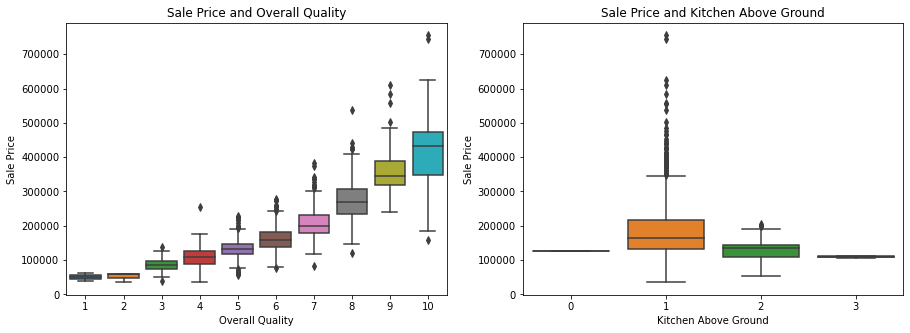

In [143]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Sale Price and Overall Quality")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Sale Price and Kitchen Above Ground")
ax2.set_xlabel("Kitchen Above Ground")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [152]:
# Replace None with appropriate text
"""
There is a strong positive correlation between the overall quality of a house and the sale price.
The a relative strong negative correlation between the houses with kitchen above ground and the sale price.
"""

'\nThere is a strong positive correlation between the overall quality of a house and the sale price.\nThe a relative strong negative correlation between the houses with kitchen above ground and the sale price.\n'

In [151]:
# description = open("data/data_description.txt")
# description.read()

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [153]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

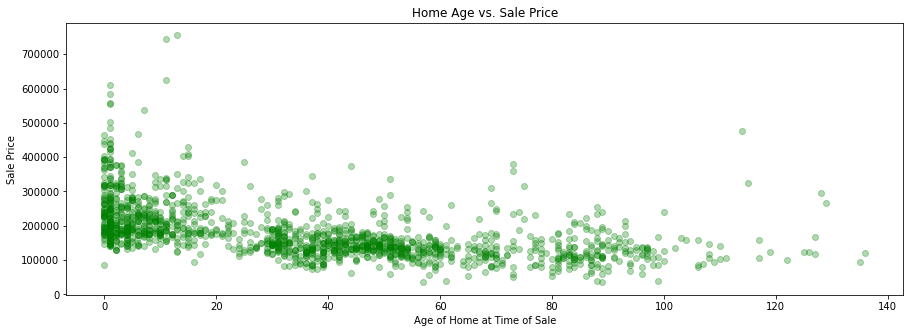

In [154]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [155]:
# Replace None with appropriate text
"""
There is a negative relationship between the age of a home and the sale price.

"""

'\nThere is a negative relationship between the age of a home and the sale price.\n\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.